**2022-05-02 `19.1-Neural-Networks - Introduction to Advanced Machine Learning`**

**Objectives**
* Compare the traditional machine learning classification and regression models with the neural network models.
* Describe the perceptron model and its components.
* Understand the concepts of a basic neural network.
* Run cloud-based Jupyter Notebooks with Google Colaboratory.
* Implement neural network models using TensorFlow.

**Resources**
* [What is a Neural Network?](https://www.youtube.com/watch?v=aircAruvnKk)
* [Hands-On in the Playground:](https://www.youtube.com/watch?v=ru9dXF04iSE)

**Presentation**
* [19.1-Neural-Networks - Introduction to Advanced Machine Learning](https://ucb.bootcampcontent.com/UCB-Coding-Bootcamp/ucb-virt-data-pt-10-2021-u-b/-/blob/master/03-Lesson-Plans/19-Neural-Networks/Slideshows/Data-M_19.1-Neural-Networks.pdf)

**Install**
```
pip install tensorflow
```

---
![](../Images/mnist_dataset.png)

---
![](../Images/nn_diagram.png)

---
![](../Images/machine_learning_diagram.png)

---
![](../Images/neural_network_example_dog_cat.png)

---
![](../Images/perceptron_model.png)

---
![](../Images/perceptron_model_input.png)

---
![](../Images/perceptron_model_weights.png)

---
![](../Images/perceptron_bias_term.png)

---
![](../Images/perceptron_net_summary.png)

---
![](../Images/linearly_versus_notlinearly.png)

---
![](../Images/perceptron_dataset_1.png)

---
![](../Images/perceptron_dataset_2.png)

---
![](../Images/perceptron_dataset_3.png)

---
![](../Images/perceptron_dataset_4.png)

---
![](../Images/neural_network_diagram.png)

---
![](../Images/sigmoid_example.png)

---
![](../Images/tanh_example.png)

---
![](../Images/relu_example.png)

---
![](../Images/leaky_relu_example.png)

---
[TensorFlow Playground](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.10587&showTestData=false&discretize=true&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&discretize_hide=true&regularization_hide=true&learningRate_hide=true&regularizationRate_hide=true&percTrainData_hide=true&showTestData_hide=true&noise_hide=true&batchSize_hide=true)

---
![](../Images/tf_playground_1.png)

---
![](../Images/tf_playground_2.png)

---
![](../Images/tf_playground_3.png)

---
![](../Images/tf_playground_4.png)

---
![](../Images/tf_playground_5.png)

---
![](../Images/tf_playground_6.png)

# ==========================================

### 1.01 Instructor Do: Understanding the TensorFlow Neural Network Structure (0:05)

In [1]:
# !pip install tensorflow

In [2]:
%matplotlib inline
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

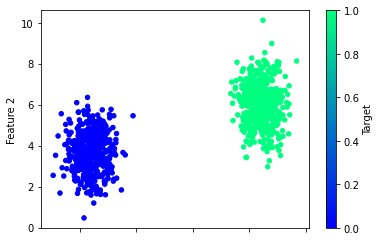

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [9]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(input_dim=2, units=5, activation="relu"))

In [10]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [11]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 9.4929e-04 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 8.3420e-04 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 7.3873e-04 - accuracy: 1.00

<AxesSubplot:>

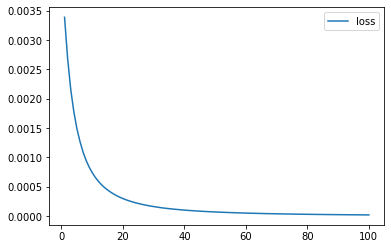

In [14]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

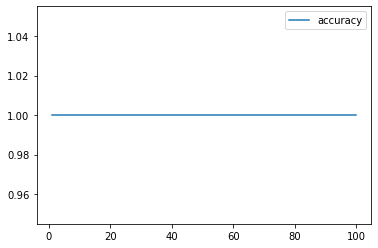

In [15]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 1.2490e-05 - accuracy: 1.0000 - 304ms/epoch - 38ms/step
Loss: 1.2489784239733126e-05, Accuracy: 1.0


# ==========================================

### 1.02 Everyone Do: Work Through a Neural Network Workflow (0:15)

In [13]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

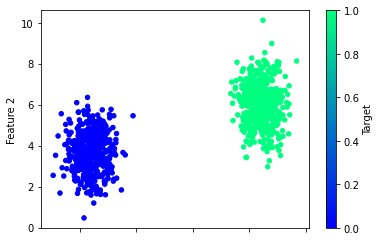

In [14]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [15]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [16]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [18]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=2))

In [19]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [20]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6736 - accuracy: 0.4253
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6231 - accuracy: 0.5720
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.7800
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.9013
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.9093
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.9240
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.9347
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.9413
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.9440
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.9507
Epoch 11/

<AxesSubplot:>

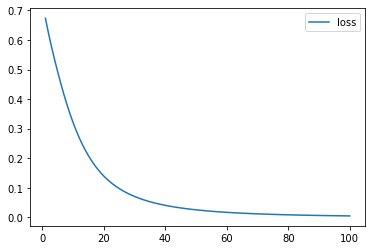

In [22]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

In [23]:
# Plot the accuracy
history_df.plot(y="accuracy")

<AxesSubplot:>

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0038 - accuracy: 1.0000 - 188ms/epoch - 24ms/step
Loss: 0.0037697458174079657, Accuracy: 1.0


# ==========================================

### 1.03 Students Do: Build Your Own Neural Network Model (0:20)

### Instructions:

  * Using the starter code provided, visualize the blobs dummy dataset using a Pandas scatter plot.

  * Randomly split the dummy data into training and test datasets using Scikit-learn's *train_test_split* method.

  * Normalize both datasets using Scikit-learn's *StandardScaler* class.

  * Create a basic neural network with 5 neurons in the hidden layer using the Keras module.

    * **Note:** Your neural network should use two inputs and produce one classification output.

  * Compile your basic neural network model.

  * Train the neural network model over 50 epochs.

  * Evaluate the performance of your model, printing your test loss metric and the predictive accuracy of the model on the test dataset.

  * **Bonus:**

  * Try creating a new neural network with a different number of neurons.

  * Train the new neural network model on the same training data, and test the performance on the same testing dataset.

  * Create a line plot that visualizes the neural network predictive accuracy over each epoch.

---

In [17]:
# %matplotlib
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [18]:
# Generate dummy dataset
X, y = make_blobs(n_samples=5000, centers=2, n_features=2, random_state=42, cluster_std=3)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

In [19]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [20]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [23]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=2))

In [24]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [25]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [28]:
# tf.keras.losses

<module 'keras.api._v2.keras.losses' from 'C:\\Users\\k\\anaconda3\\envs\\PythonData\\lib\\site-packages\\keras\\api\\_v2\\keras\\losses\\__init__.py'>

In [26]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
118/118 [==============================] - 1s 2ms/step - loss: 0.5709 - accuracy: 0.8739
Epoch 2/50
118/118 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.9419
Epoch 3/50
118/118 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.9445
Epoch 4/50
118/118 [==============================] - 0s 2ms/step - loss: 0.2218 - accuracy: 0.9456
Epoch 5/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.9461
Epoch 6/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9464
Epoch 7/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.9461
Epoch 8/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1379 - accuracy: 0.9480
Epoch 9/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1331 - accuracy: 0.9491
Epoch 10/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.9493

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - loss: 0.1238 - accuracy: 0.9520 - 279ms/epoch - 7ms/step
Loss: 0.12378474324941635, Accuracy: 0.9520000219345093


In [31]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

<AxesSubplot:>

# ==========================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "19.1-Neural-Networks - Introduction to Advanced Machine Learning"
objectives = [
    "Compare the traditional machine learning classification and regression models with the neural network models",
    "Describe the perceptron model and its components",
    "Understand the concepts of a basic neural network",
    "Run cloud-based Jupyter Notebooks with Google Colaboratory",
    "Implement neural network models using TensorFlow",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))